<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [17]:
import sys
print(sys.executable)
import micropip
await micropip.install('seaborn')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

from scipy import stats


/home/pyodide/this.program


#### Read the dataset in the csv file from the URL


In [ ]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


#### **Task 1: Become familiar with the dataset**
The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's


#### **Load Dataset**

In [2]:
# 加载数据
df = pd.read_csv('boston_housing.csv')
df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [3]:
df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [5]:
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [6]:
df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

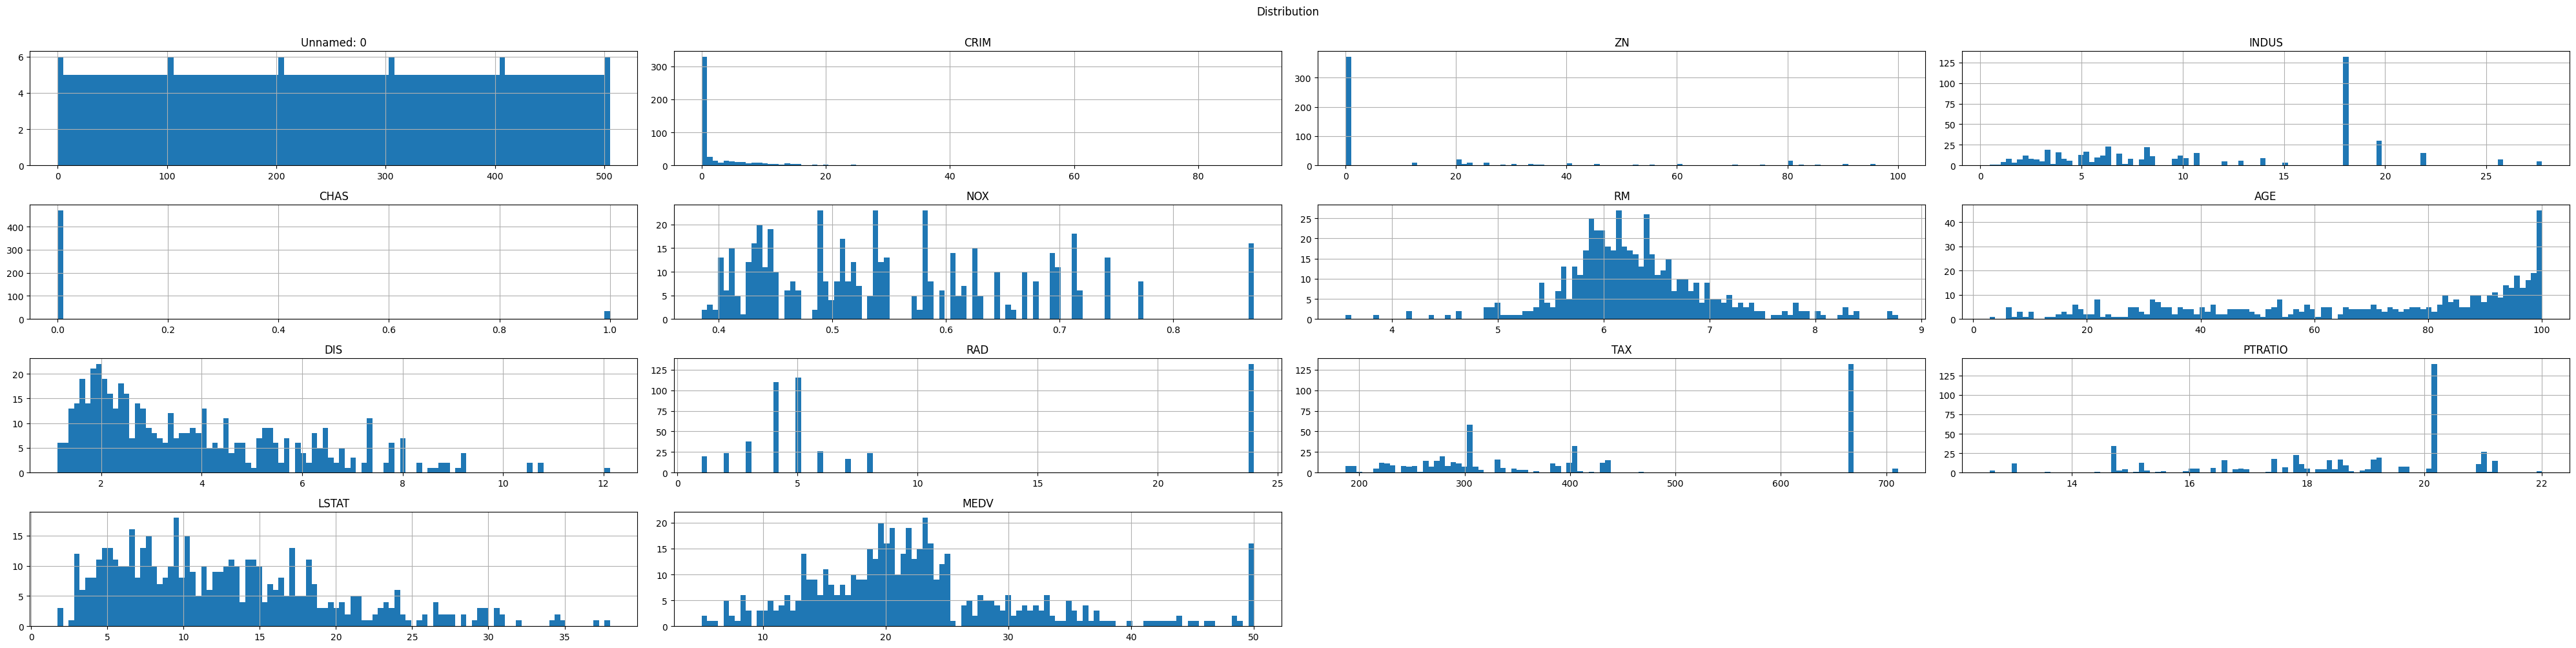

In [22]:
df.hist(bins=100, figsize=(40,10))
plt.suptitle('Distribution', x=0.5, y=1.0, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

#### **Task 2: Generate Descriptive Statistics and Visualizations**

#### **1.For the "Median value of owner-occupied homes" provide a boxplot**

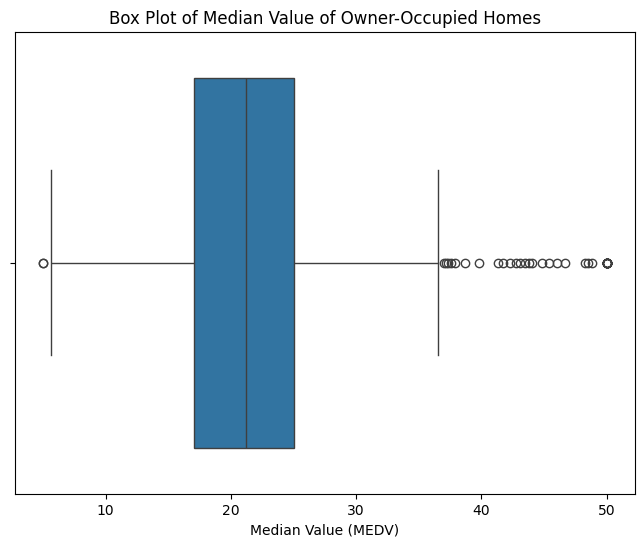

In [11]:

# 方框图
plt.figure(figsize=(8, 6))
sns.boxplot(x='MEDV', data=df)
plt.title('Box Plot of Median Value of Owner-Occupied Homes')
plt.xlabel('Median Value (MEDV)')
plt.show()

#### **2.Provide a  bar plot for the Charles river variable**

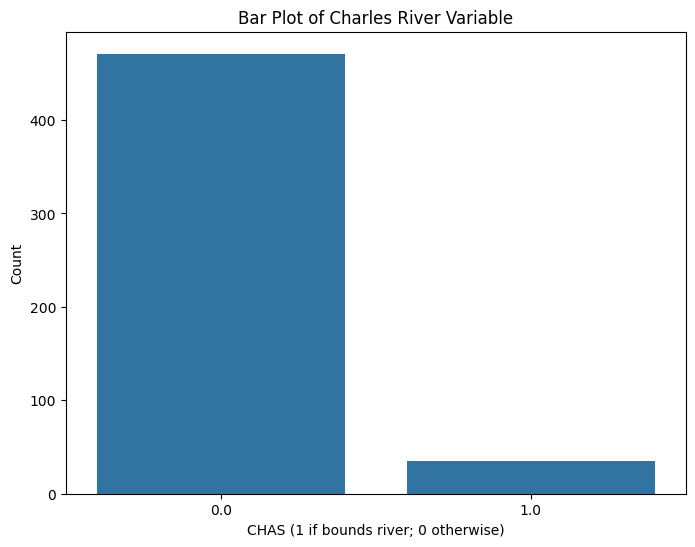

In [12]:
# 柱状图
plt.figure(figsize=(8, 6))
sns.countplot(x='CHAS', data=df)
plt.title('Bar Plot of Charles River Variable')
plt.xlabel('CHAS (1 if bounds river; 0 otherwise)')
plt.ylabel('Count')
plt.show()

#### **3.Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)**

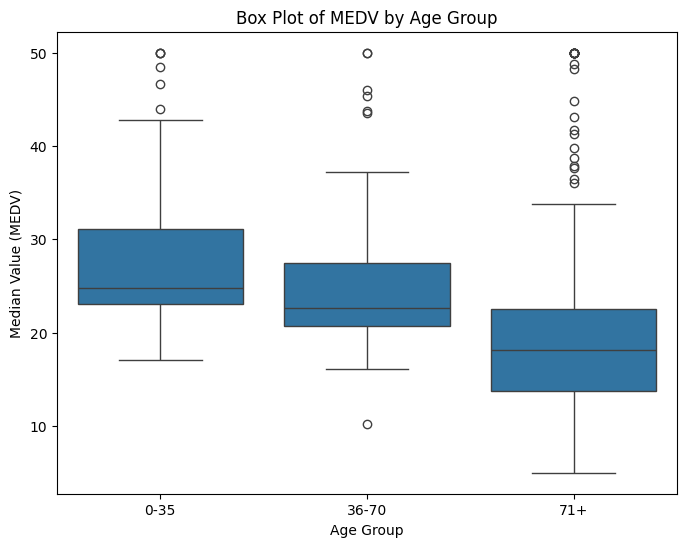

In [13]:
# 将 AGE 离散为三个组
df['AGE_group'] = pd.cut(df['AGE'], bins=[0, 35, 70, 100], labels=['0-35', '36-70', '71+'])

# 方框图
plt.figure(figsize=(8, 6))
sns.boxplot(x='AGE_group', y='MEDV', data=df)
plt.title('Box Plot of MEDV by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value (MEDV)')
plt.show()

#### **4.Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?**

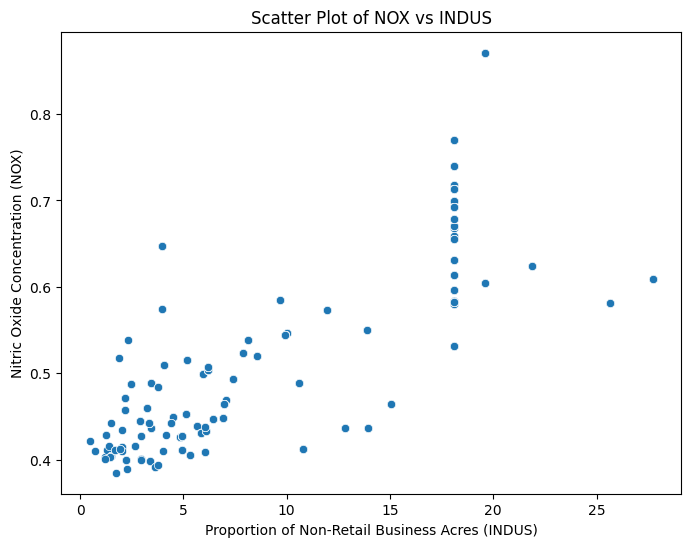

In [14]:
# 散点图
plt.figure(figsize=(8, 6))
sns.scatterplot(x='INDUS', y='NOX', data=df)
plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.ylabel('Nitric Oxide Concentration (NOX)')
plt.show()

#### **5.Create a histogram for the pupil to teacher ratio variable**


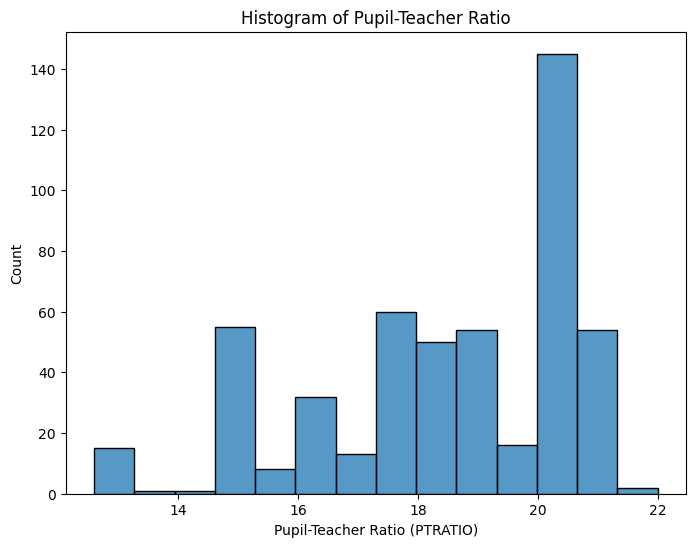

In [15]:
# 柱状图
plt.figure(figsize=(8, 6))
sns.histplot(df['PTRATIO'], kde=False)
plt.title('Histogram of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio (PTRATIO)')
plt.ylabel('Count')
plt.show()

#### **Task 3: Use the appropriate tests to answer the questions provided.**

#### **1.Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)**


In [18]:

# 以查尔斯河为界的两组房屋的 MEDV
chas_1 = df[df['CHAS'] == 1]['MEDV']
chas_0 = df[df['CHAS'] == 0]['MEDV']

# 独立样本T检验
t_stat, p_value = stats.ttest_ind(chas_1, chas_0)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: 3.996437466090509, P-value: 7.390623170519905e-05


#### **T-test for median house value based on the Charles River boundary**:
   - **T-statistic**: 3.9964
   - **P-value**: 7.39e-05
   - **Conclusion**: Since the p-value is much smaller than 0.05, we reject the null hypothesis. This indicates that there is a significant difference in the median house value (MEDV) between houses that are bounded by the Charles River and those that are not.



#### **2.Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)**


In [19]:

# 方差分析
model = ols('MEDV ~ AGE_group', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                 sum_sq     df         F        PR(>F)
AGE_group   5401.731883    2.0  36.40765  1.710501e-15
Residual   37314.563532  503.0       NaN           NaN


#### **ANOVA for the impact of AGE on MEDV**:
   - **F-statistic**: 36.41
   - **P-value**: 1.71e-15
   - **Conclusion**: With a p-value much smaller than 0.05, we reject the null hypothesis. This implies that there is a significant difference in median house values (MEDV) across different age groups (houses built before 1940 with different proportions).



#### **3.Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)**


In [20]:
# 皮尔逊相关系数
corr, p_value = stats.pearsonr(df['NOX'], df['INDUS'])
print(f'Pearson Correlation: {corr}, P-value: {p_value}')

Pearson Correlation: 0.7636514469209192, P-value: 7.913361061210442e-98


#### **Correlation between NOX and INDUS**:
   - **Pearson Correlation**: 0.7637
   - **P-value**: 7.91e-98
   - **Conclusion**: The strong positive correlation (0.7637) and extremely small p-value suggest a significant and strong positive relationship between nitric oxide concentration (NOX) and the proportion of non-retail business acres (INDUS). As INDUS increases, NOX tends to increase.



#### **4.What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)**

In [21]:
# 回归分析
X = df[['DIS']]
y = df['MEDV']
X = sm.add_constant(X)  # 添加常数项
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        16:51:10   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

#### **Regression analysis for the effect of DIS on MEDV**:
   - **R-squared**: 0.062
   - **F-statistic**: 33.58
   - **P-value**: 1.21e-08
   - **Conclusion**: The p-value is much smaller than 0.05, so we reject the null hypothesis, meaning the weighted distance to employment centers (DIS) has a significant positive effect on the median house value (MEDV). However, the R-squared value of 0.062 indicates that DIS explains only 6.2% of the variation in MEDV, suggesting a weak relationship overall.